In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
df = pd.read_csv('dummy_data.csv')

In [349]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


<Axes: xlabel='time_spent', ylabel='gender'>

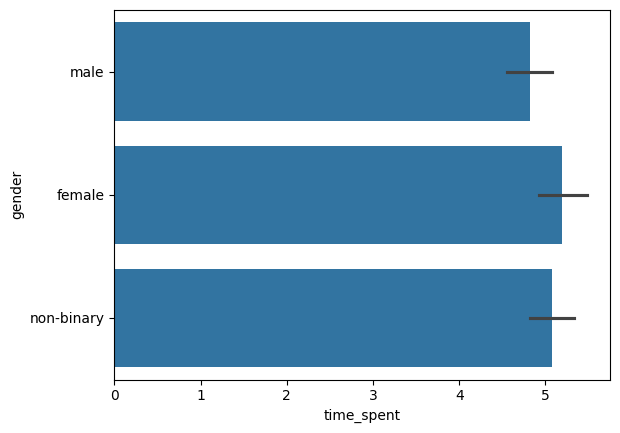

In [350]:
sns.barplot(data = df, x = 'time_spent' , y = 'gender')

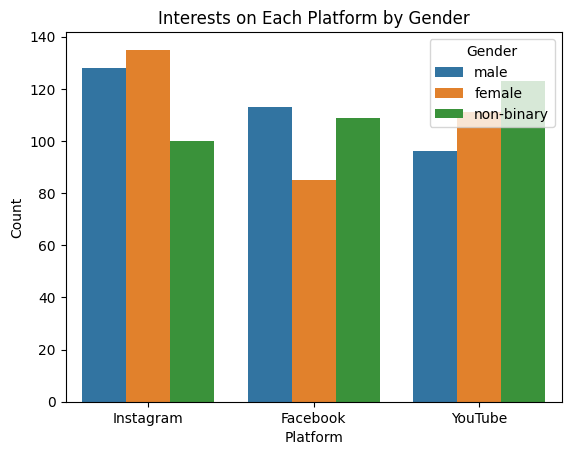

In [351]:
sns.countplot(x='platform', hue='gender', data=df)
plt.title('Interests on Each Platform by Gender')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

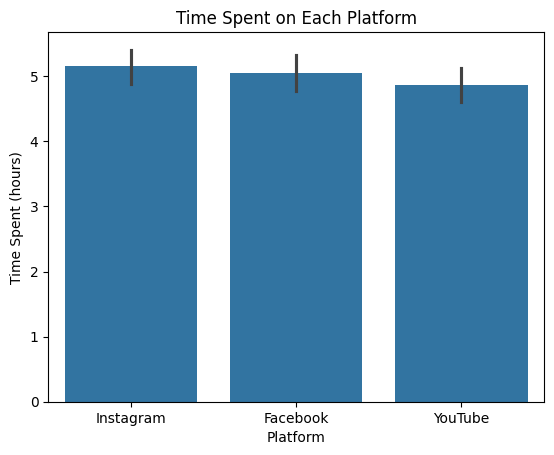

In [352]:
sns.barplot(x='platform', y='time_spent', data=df)
plt.title('Time Spent on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Time Spent (hours)')
plt.show()

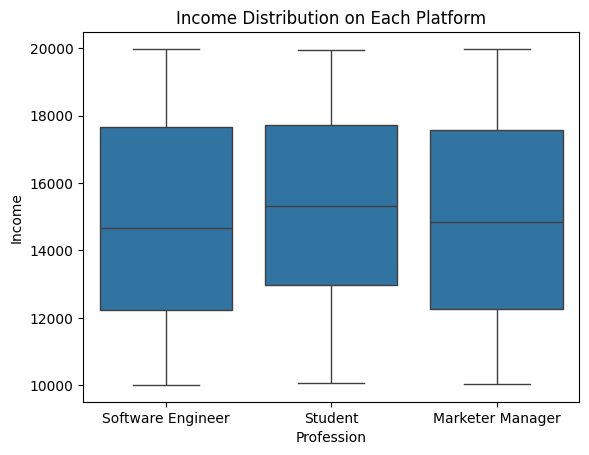

In [353]:
# กราฟเปรียบเทียบรายได้ในแต่ละแพลตฟอร์ม
sns.boxplot(x='profession', y='income', data=df)
plt.title('Income Distribution on Each Platform')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.show()

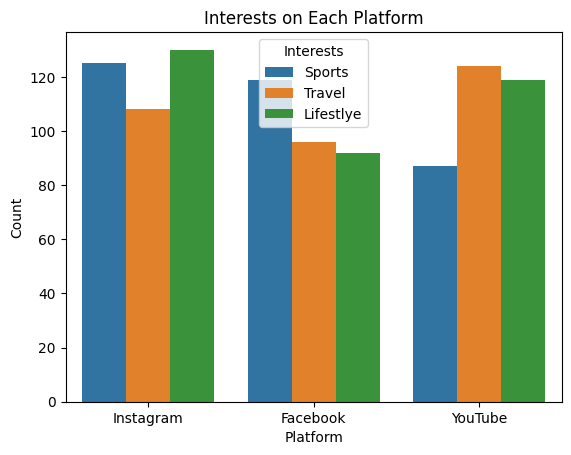

In [354]:
# กราฟเปรียบเทียบความสนใจในแต่ละแพลตฟอร์ม
sns.countplot(x='platform', hue='interests', data=df)
plt.title('Interests on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Interests')
plt.show()


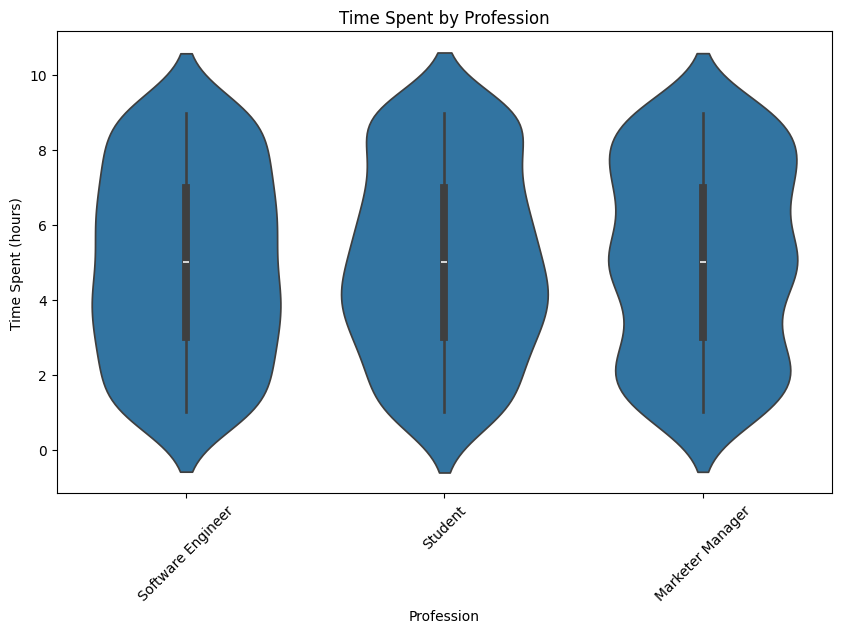

In [355]:
# กราฟเปรียบเทียบการใช้เวลาต่ออาชีพ
plt.figure(figsize=(10, 6))
sns.violinplot(x='profession', y='time_spent', data=df)
plt.title('Time Spent by Profession')
plt.xlabel('Profession')
plt.ylabel('Time Spent (hours)')
plt.xticks(rotation=45)
plt.show()


In [356]:
def life_stage(age):
    if age >0 and age <12:
        return "child"
    elif age>=12 and age<=18:
        return "teenage"
    elif age>18 and age<40:
        return "young"
    elif age>=40 and age<=60:
        return "middle_age"
    else:
        return "old"

In [357]:
def Screen_time(number):
    if number<=2:
        return "Normal"
    elif number>2 and number<=4:
        return "Moderate"
    elif number>4 and number<=6:
        return "High"
    elif number>6:
        return "Extreme"

In [358]:
df["life_stage"] = df["age"].apply(life_stage)
df["Screen_time"] = df["time_spent"].apply(Screen_time)

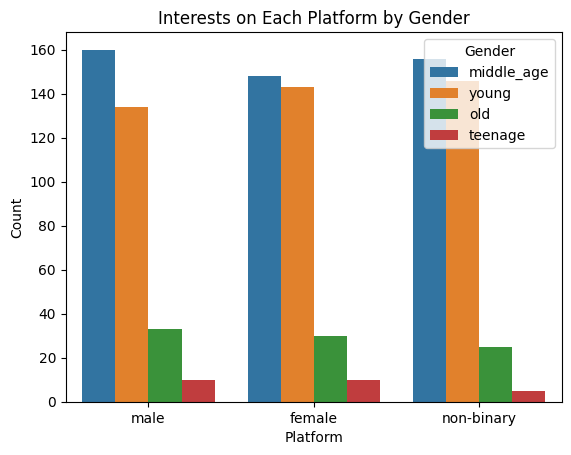

In [359]:
# สร้างกราฟเปรียบเทียบความสนใจในแต่ละแพลตฟอร์มตามเพศ (gender) และแพลตฟอร์ม (platform)
sns.countplot(x='gender', hue='life_stage', data=df)
plt.title('Interests on Each Platform by Gender')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


<Axes: xlabel='life_stage', ylabel='count'>

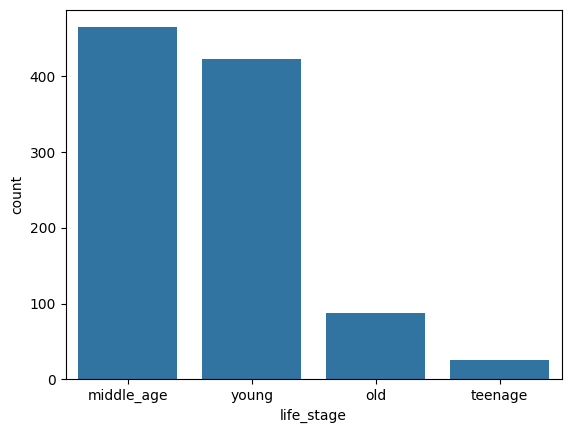

In [360]:
sns.countplot(x=df["life_stage"])

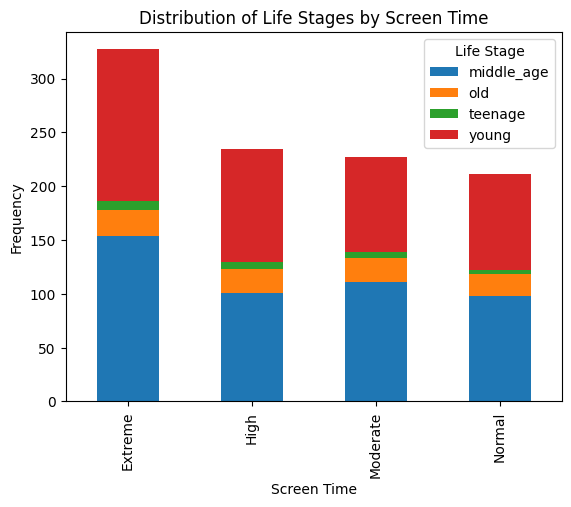

In [361]:
df.groupby(['Screen_time', 'life_stage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Life Stages by Screen Time')
plt.legend(title='Life Stage')
plt.show()

In [362]:
# df.groupby(['Screen_time', 'gender']).size().unstack().plot(kind='bar', stacked=True)
# plt.xlabel('Screen Time')
# plt.ylabel('Frequency')
# plt.title('Distribution of Life Stages by Screen Time')
# plt.legend(title='Life Stage')
# plt.show()

time_spent / platform

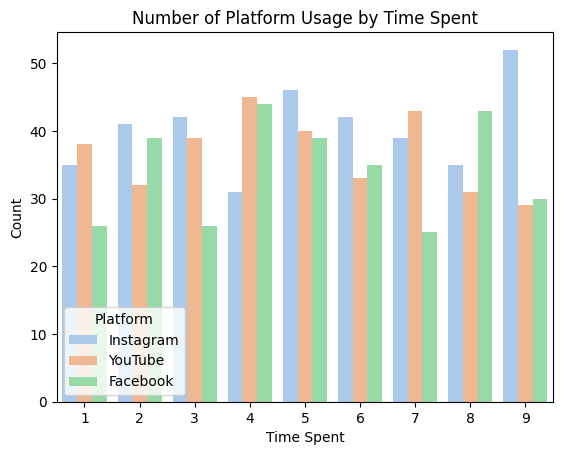

In [363]:
df['count'] = df.groupby(['platform','time_spent']).platform.transform('size')

sns.barplot(data=df, x='time_spent', y='count', hue='platform',palette='pastel')
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.title('Number of Platform Usage by Time Spent')
plt.legend(title='Platform')
plt.show()

platform / life_stage

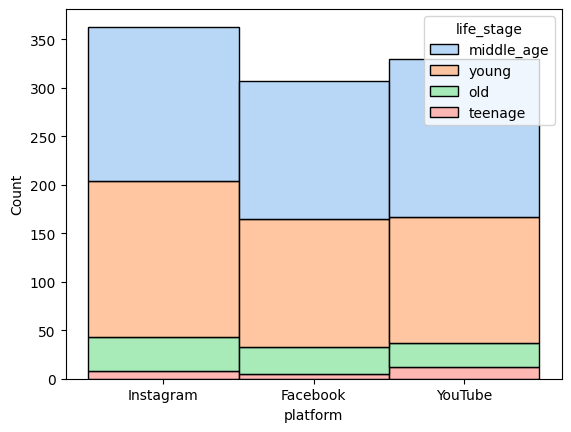

In [364]:
sns.histplot(data=df, x='platform', hue='life_stage', multiple='stack',palette='pastel')
plt.show()

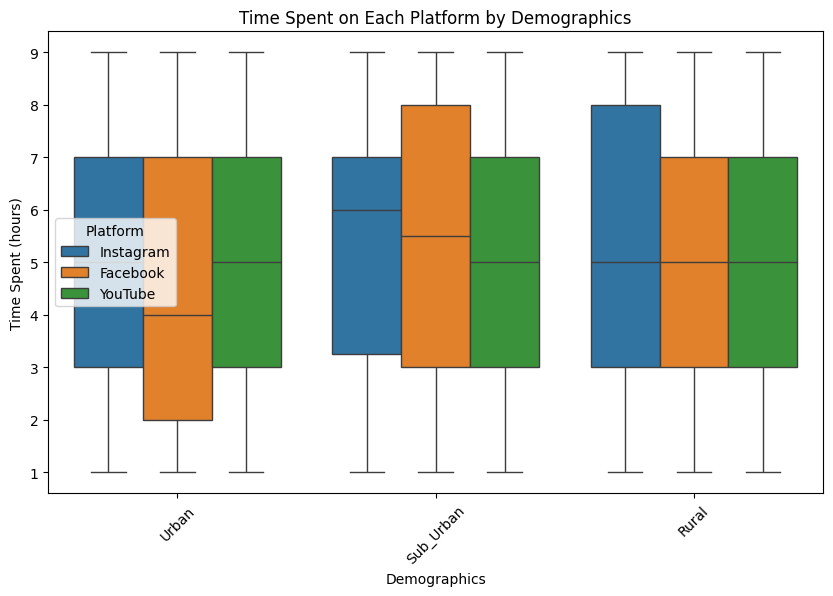

In [365]:
# สร้าง Boxplot เพื่อดูการใช้เวลาในแต่ละแพลตฟอร์มตาม demographics
plt.figure(figsize=(10, 6))
sns.boxplot(x='demographics', y='time_spent', hue='platform', data=df)
plt.title('Time Spent on Each Platform by Demographics')
plt.xlabel('Demographics')
plt.ylabel('Time Spent (hours)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()


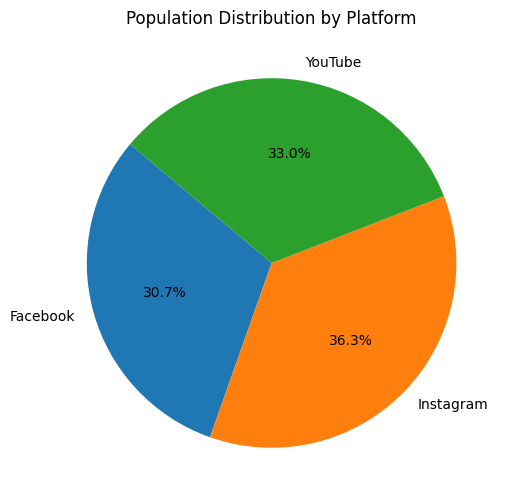

In [366]:
# หาสัดส่วนของประชากรตามแต่ละแพลตฟอร์ม
platform_counts = df.groupby('platform')['age'].count()

# พล็อต Pie chart
plt.figure(figsize=(8, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution by Platform')
plt.show()


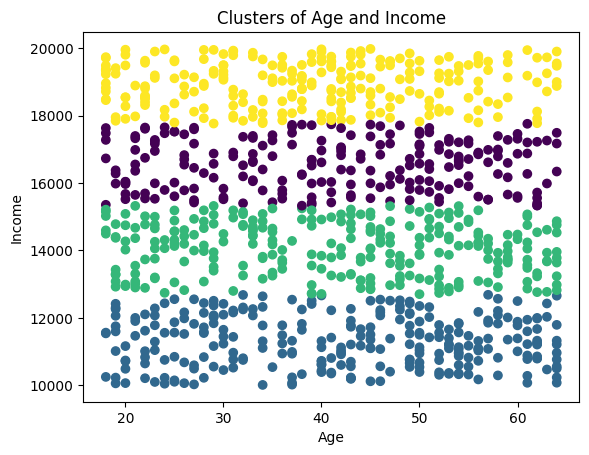

In [367]:
from sklearn.cluster import KMeans

# สร้าง DataFrame ที่มีเฉพาะตัวแปรที่ต้องการใช้ในการจัดกลุ่ม
X = df[['age', 'income']]

# กำหนดจำนวนกลุ่ม
kmeans = KMeans(n_clusters=4)

# ทำการ fit ข้อมูล
kmeans.fit(X)

# เพิ่มข้อมูลกลุ่มลงใน DataFrame
df['cluster'] = kmeans.labels_

# พล็อต scatter plot แสดงกลุ่ม
plt.scatter(df['age'], df['income'], c=df['cluster'], cmap='viridis')
plt.title('Clusters of Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


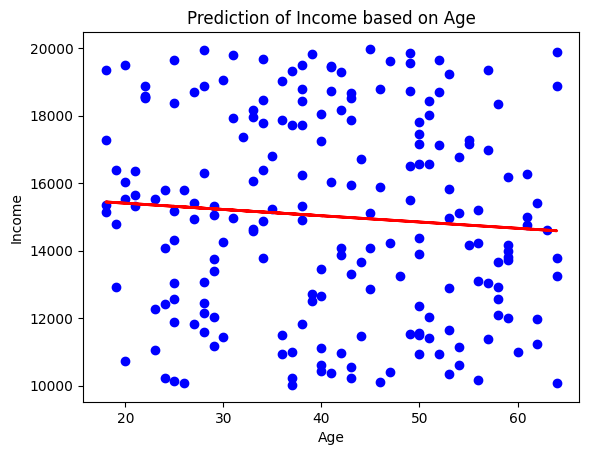

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# สร้าง DataFrame ที่มีเฉพาะตัวแปรที่ต้องการใช้ในการคาดการณ์
X = df[['age']]
y = df['income']

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและ fit โมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# ทำการคาดการณ์
y_pred = model.predict(X_test)

# พล็อต scatter plot แสดงการคาดการณ์
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Prediction of Income based on Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


In [369]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# เลือกเฉพาะคอลัมน์ที่สนใจ
df = df[['age', 'profession', 'platform']]
# แปลงอายุเป็นช่วงอายุ
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61+'])
# กำหนดให้ตัวแปร profession เป็น string เพื่อให้ Apriori algorithm ทำงานได้
df['profession'] = df['profession'].astype(str)


In [370]:
# ทำ One-Hot Encoding
df_encoded = pd.get_dummies(df[['age_group', 'profession', 'platform']], prefix='', prefix_sep='')

# คำนวณความถี่ของแต่ละ Itemsets โดยใช้ Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# แสดง Itemsets ที่เกิดขึ้นบ่อย
print(frequent_itemsets)


    support                        itemsets
0     0.248                         (19-30)
1     0.199                         (31-40)
2     0.239                         (41-50)
3     0.201                         (51-60)
4     0.088                           (61+)
5     0.355              (Marketer Manager)
6     0.336             (Software Engineer)
7     0.309                       (Student)
8     0.307                      (Facebook)
9     0.363                     (Instagram)
10    0.330                       (YouTube)
11    0.099       (Marketer Manager, 19-30)
12    0.073      (19-30, Software Engineer)
13    0.076                (Student, 19-30)
14    0.077               (Facebook, 19-30)
15    0.099              (19-30, Instagram)
16    0.072                (19-30, YouTube)
17    0.067       (Marketer Manager, 31-40)
18    0.074      (Software Engineer, 31-40)
19    0.058                (Student, 31-40)
20    0.065               (Facebook, 31-40)
21    0.068              (Instag